In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
pd.set_option("display.max_columns", None)

In [20]:
df_2019 = pd.read_csv("./Instructions/Resources/2019loans.csv")

In [21]:
df_2020 = pd.read_csv("./Instructions/Resources/2020Q1loans.csv")

In [22]:
df_2019.select_dtypes("object").apply(pd.Series.nunique, axis=0)


home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    2
dtype: int64

In [23]:
df_2020.select_dtypes("object").apply(pd.Series.nunique, axis=0)

home_ownership          4
verification_status     3
loan_status             2
pymnt_plan              1
initial_list_status     2
application_type        2
hardship_flag           2
debt_settlement_flag    1
dtype: int64

In [24]:
df_2020.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [25]:
df_2019['int_rate'] = pd.Series([round(val, 2) for val in df_2019['int_rate']], index = df_2019.index)
df_2019['int_rate'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_2019['int_rate']], index = df_2019.index)

In [26]:
df_2019['int_rate'] = (pd.to_numeric(df_2019['int_rate'].str[:-1])
                            .div(100)
                            .mask(df_2019['int_rate'] == '%', 0))

[Text(0, 0, '0.06'),
 Text(1, 0, '0.07'),
 Text(2, 0, '0.08'),
 Text(3, 0, '0.09'),
 Text(4, 0, '0.1'),
 Text(5, 0, '0.11'),
 Text(6, 0, '0.12'),
 Text(7, 0, '0.13'),
 Text(8, 0, '0.14'),
 Text(9, 0, '0.15'),
 Text(10, 0, '0.16'),
 Text(11, 0, '0.17'),
 Text(12, 0, '0.18'),
 Text(13, 0, '0.19'),
 Text(14, 0, '0.2'),
 Text(15, 0, '0.21'),
 Text(16, 0, '0.22'),
 Text(17, 0, '0.23'),
 Text(18, 0, '0.24'),
 Text(19, 0, '0.25'),
 Text(20, 0, '0.26'),
 Text(21, 0, '0.27'),
 Text(22, 0, '0.29'),
 Text(23, 0, '0.31')]

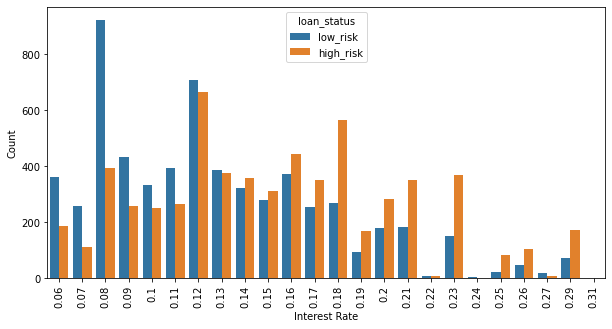

In [27]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x=df_2019['int_rate'].sort_values(), hue=df_2019['loan_status'])
chart.set(xlabel='Interest Rate', ylabel='Count')

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\Users\TriciaToffey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


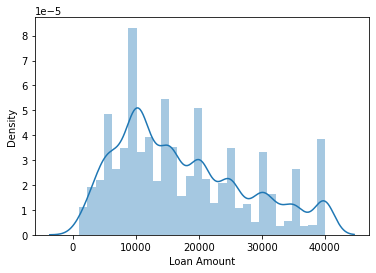

In [28]:
sns.distplot(df_2019['loan_amnt'], hist=True, kde=True, rug=False, norm_hist=True, axlabel='Loan Amount')
plt.show()

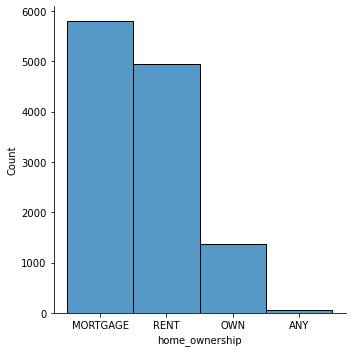

In [29]:
sns.displot(df_2019, x="home_ownership")

In [30]:
df_2019.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)

In [31]:
from sklearn import preprocessing

In [32]:
count = 0
for col in df_2019:
    if df_2019[col].dtype == 'object':
        if len(list(df_2019[col].unique())) <=2:
            le = preprocessing.LabelEncoder()
            df_2019[col]=le.fit_transform(df_2019[col])
            count += 1
            print(col)
            
print('%d columns were label encoded.' % count)

loan_status
pymnt_plan
initial_list_status
application_type
hardship_flag
debt_settlement_flag
6 columns were label encoded.


In [33]:
df_2019 = pd.get_dummies(df_2019)
df_2019

,loan_amnt,int_rate,installment,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,13375.0,0.18,483.34,223000.0,1,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,1,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,0,0,1,0,0,1,0,0
1,21000.0,0.13,478.68,123000.0,1,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,1,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,0,0,1,0,0,0,1,0
2,20000.0,0.12,448.95,197000.0,1,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,1,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,0,0,1,0,0,0,1,0
3,3000.0,0.12,100.22,45000.0,1,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,1,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,0,0,1,1,0,0
4,30000.0,0.16,1056.49,133000.0,1,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,1,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,19975.0,0.26,801.09,28000.0,0,0,28.42,0.0,0.0,15.0,0.0,9679.0,32.0,1,16305.16,16305.16,7

In [34]:
X=df_2019.drop('loan_status', axis=1)
y=df_2019['loan_status']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)

In [36]:
#Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

[0.00163125 0.0149002  0.06144441 0.01753407 0.         0.01874183
 0.00115335 0.00520705 0.00127301 0.00147739 0.01424741 0.0108673
 0.00126048 0.01253081 0.02685786 0.03747405 0.01385068 0.10897301
 0.07909245 0.0274004  0.         0.         0.14763608 0.0030388
 0.         0.00111788 0.         0.00551078 0.0112369  0.00159286
 0.00712285 0.00237815 0.00647612 0.01383849 0.00797528 0.0086604
 0.00278493 0.00464339 0.01711876 0.01240593 0.01005021 0.00502355
 0.00621164 0.00672223 0.00702475 0.01269368 0.01631782 0.01627587
 0.         0.         0.01900845 0.02523991 0.00666453 0.01102907
 0.0044436  0.01739117 0.01390095 0.00259207 0.00342026 0.00323544
 0.00614595 0.00697376 0.00684444 0.00643784 0.00910854 0.00621903
 0.00778531 0.         0.         0.         0.00460839 0.00505476
 0.00555491 0.         0.         0.00870949 0.00969202 0.00679597
 0.00678118 0.00178477 0.         0.         0.         0.00109506
 0.00178926 0.         0.00191947 0.        ]


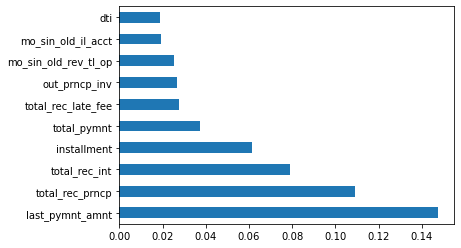

In [43]:
print(dtree.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [44]:
predictions = dtree.predict(X_test)

In [45]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69      3609
           1       0.70      0.68      0.69      3699

    accuracy                           0.69      7308
   macro avg       0.69      0.69      0.69      7308
weighted avg       0.69      0.69      0.69      7308

[[2519 1090]
 [1196 2503]]


In [46]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [47]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [48]:
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.6830870279146142
Testing Data Score: 0.6804871373836892


In [49]:
lr.score(X, y)

0.6815270935960591

In [50]:
confusion_matrix(y, lr.predict(X))

array([[3976, 2114],
       [1765, 4325]], dtype=int64)

In [52]:
#LR - Predictions
predictions = lr.predict(df_2020)

In [53]:
predictions = lr.predict(X_test)
pd.DataFrame({"Predictions": predictions, "Actual": y_test})

,Predictions,Actual
4767,1,1
8968,0,0
1139,0,1
2372,1,1
7899,0,0
...,...,...
1251,1,1
3176,1,1
5072,1,1
3359,0,1


In [54]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(n_estimators=600)

In [56]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [57]:
predictions=rfc.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      3609
           1       0.80      0.75      0.77      3699

    accuracy                           0.77      7308
   macro avg       0.78      0.77      0.77      7308
weighted avg       0.78      0.77      0.77      7308



In [59]:
print(confusion_matrix(y_test, predictions))

[[2900  709]
 [ 938 2761]]


In [60]:
#Scaled Data - LR
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [61]:
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      3609
           1       0.68      0.71      0.69      3699

    accuracy                           0.68      7308
   macro avg       0.68      0.68      0.68      7308
weighted avg       0.68      0.68      0.68      7308

[[2361 1248]
 [1075 2624]]
Accuracy of model is:  0.6821291735084839


In [62]:
y_true = y_test
confusion_matrix(y_true, y_pred)

array([[2361, 1248],
       [1075, 2624]], dtype=int64)

In [63]:
target_names = ['high_risk', 'low_risk']

In [64]:
#Scaled Data - Random Forest
clf = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print("Accuracy of model is: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

   high_risk       0.75      0.80      0.78      3609
    low_risk       0.79      0.74      0.77      3699

    accuracy                           0.77      7308
   macro avg       0.77      0.77      0.77      7308
weighted avg       0.77      0.77      0.77      7308

Training Score: 1.0
Testing Score: 0.7720306513409961
Accuracy of model is:  0.7720306513409961


In [65]:
y_true = y_test
confusion_matrix(y_true, y_pred)

array([[2901,  708],
       [ 958, 2741]], dtype=int64)